In [1]:
import pandas as pd
import sys
sys.path.append('../') 
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary functions
from src.loader import load_data
from src.clean import clean_data

# Load data
sql_query = '''
    
 SELECT * FROM xdr_data
 '''

df = load_data(sql_query)


In [2]:
# apply data cleaning function
df = clean_data(df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


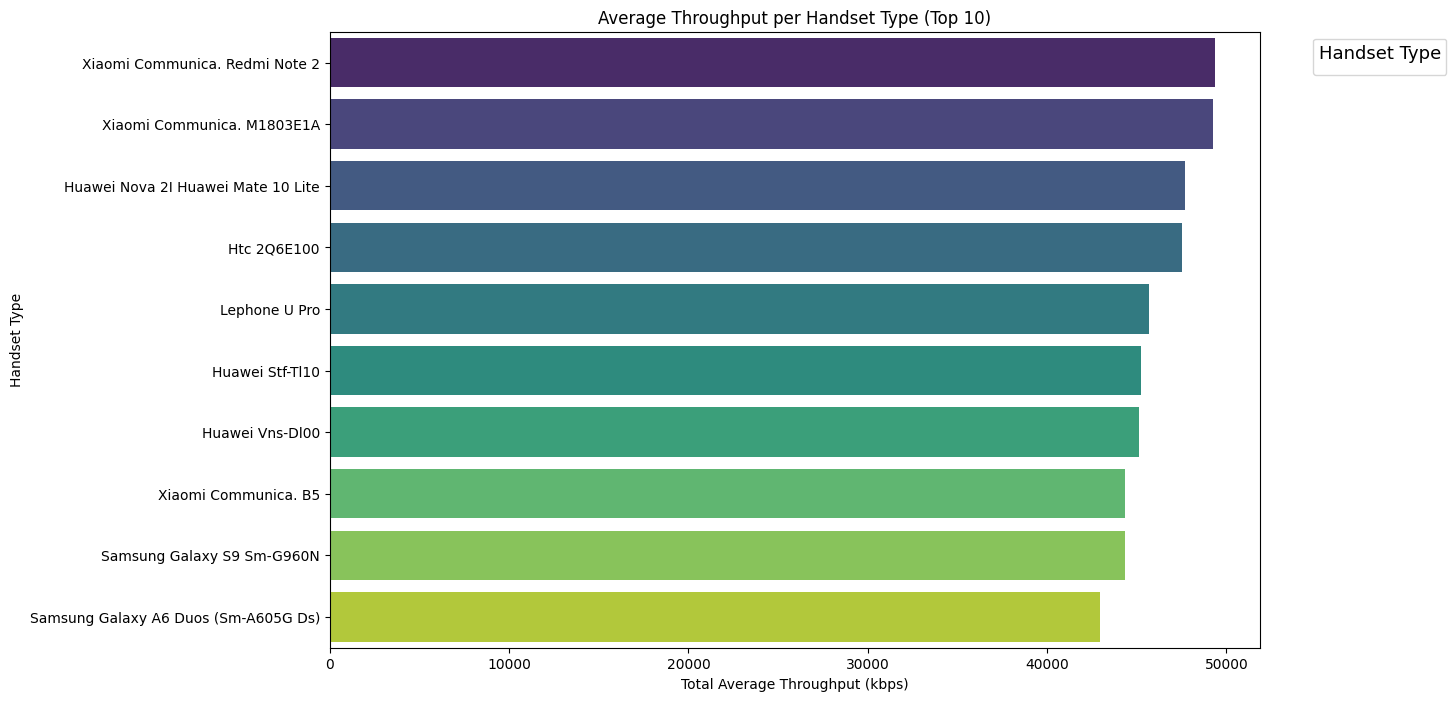

In [13]:
# Group by handset type and calculate the average throughput
avg_throughput_per_handset = df.groupby('Handset Type').agg({
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
}).reset_index()

# Adding uplink and downlink to get total average throughput

avg_throughput_per_handset['Total Average Throughput (kbps)'] = avg_throughput_per_handset['Avg Bearer TP DL (kbps)'] + avg_throughput_per_handset['Avg Bearer TP UL (kbps)']

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate top 10 handsets for better visual clarity
top_handsets = avg_throughput_per_handset.nlargest(10, 'Total Average Throughput (kbps)')
top_handsets.sort_values(by='Total Average Throughput (kbps)', ascending=False, inplace=True)

# Create a plot
plt.figure(figsize=(12, 8))
# Adding a hue that corresponds to the 'Handset Type' directly for clarity and compliance with future versions
sns.barplot(data=top_handsets, x='Total Average Throughput (kbps)', y='Handset Type', hue='Handset Type', dodge=False, palette='viridis')
plt.title('Average Throughput per Handset Type (Top 10)')
plt.xlabel('Total Average Throughput (kbps)')
plt.ylabel('Handset Type')
plt.legend(title='Handset Type', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



### Interpretation:

    Handsets with higher throughput values may be better optimized for your network, or they could be newer models with better hardware.
    Differences in throughput across handset types could inform targeted upgrades or marketing campaigns aimed at users with older or underperforming devices.

/var/folders/xm/hbwsr__s2bnfkwhtlgztw7wm0000gn/T/ipykernel_833/1804450499.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tcp_handsets, x='Total Average TCP Retransmission (Bytes)', y='Handset Type', palette='inferno')


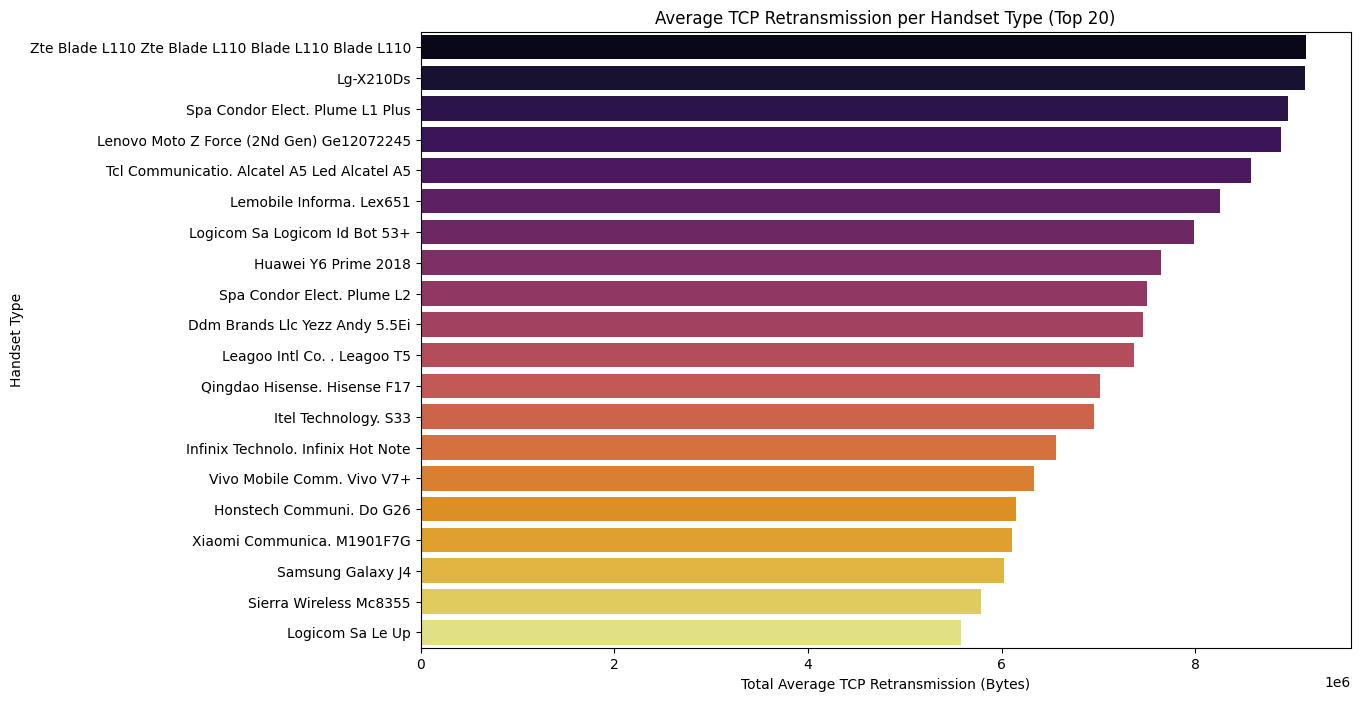

In [18]:
# Group by handset type and calculate the average TCP retransmission volumes
avg_tcp_retrans_per_handset = df.groupby('Handset Type').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean'
}).reset_index()

# Summing uplink and downlink TCP retransmissions
avg_tcp_retrans_per_handset['Total Average TCP Retransmission (Bytes)'] = avg_tcp_retrans_per_handset['TCP DL Retrans. Vol (Bytes)'] + avg_tcp_retrans_per_handset['TCP UL Retrans. Vol (Bytes)']

# Plotting the results
plt.figure(figsize=(12, 8))
top_tcp_handsets = avg_tcp_retrans_per_handset.nlargest(20, 'Total Average TCP Retransmission (Bytes)')
sns.barplot(data=top_tcp_handsets, x='Total Average TCP Retransmission (Bytes)', y='Handset Type', palette='inferno')
plt.title('Average TCP Retransmission per Handset Type (Top 20)')
plt.xlabel('Total Average TCP Retransmission (Bytes)')
plt.ylabel('Handset Type')
plt.show()




### Interpretation:

    Higher average TCP retransmission volumes could indicate problematic handsets or network compatibility issues, suggesting areas for technical troubleshooting.
    This data can be crucial for technical support teams in prioritizing issues related to specific handset types.